# РГР 1. Статиcтическая обработка данных

- Скачать этот файл (блокнот) https://github.com/VetrovSV/ST/blob/master/task1/Python.%20Statistics%202.ipynb (кнопка Raw, далее сохранить через браузер)

- Для запуска блокнота с кодом нужно скачать Anaconda 
https://www.anaconda.com/distribution/#download-section

- Далее открыть Jupyter (это часть Anaconda).

- в Jupyter выбрать этот файл `Python. Statistics 2.ipynb` 

- сохранить файл с данными (https://github.com/VetrovSV/ST/tree/master/task1/data) в ту же папку, что и блокнот (выбрать файл, кнопка Raw, сохранить через браузер)

- указать имя файла с данными в 4-й строке `data = pandas.read_csv("data/V29.csv")`  (см. ниже)

- наконец запустить все вычисления в этом блокноте: меню Сell -> Run All

- использовать изображения и данные для оформления работы

- при необходимости 

In [1]:
# подключение необходимых библиотек
import numpy
import scipy.stats
import seaborn
import pandas
from matplotlib.pyplot import *

%matplotlib inline

# настройка вывода вещественых чисел (не использовать запись вида 1.4e01)
numpy.set_printoptions(suppress=True)

In [2]:
# загрузим данные из файла
# здесь файл расположен в папке data, которая расположена в той же папке, что и эта программа
# следует выбирать относительный путь к файлу и избегать использования кририлицы в пути
data = pandas.read_csv("data/V29.csv")

# удалим нулевой столбец, который содержит порядковые номера для пар X и Y (см. файл)
del data [data.columns[0]] 

# краткая информация о данных
print(data.describe())

# вычислим основные числовые характеристики
meanX = numpy.mean(data.X)
sdX = numpy.std( data.X , ddof=1)
medX = numpy.median(data.X)
modeX = scipy.stats.mode(data.X)

print()
print( "Мода : {:.2f}".format(medX))

                X           Y
count  100.000000  100.000000
mean    10.004400   15.152000
std      3.121613    3.048496
min      2.720000    7.950000
25%      7.727500   13.407500
50%      9.900000   15.020000
75%     12.110000   16.652500
max     18.790000   23.570000

Мода : 9.90


Выше приведены некоторые числовые характеристики выборок из X и Y
- mean - среднее
- std - стандартное отклонение
- 25%, 50%, 75% - квартили

## Гистограммы

Простая гистограмма: 

seaborn.distplot(data.X)

subplots(figsize=(12,8)) - задаёт размер изображения

задание стиля координатной сетки

seaborn.set_style("whitegrid", {'grid.linestyle': '--'})

параметр  hist_kws = dict(edgecolor="k", linewidth=1) задаёт цвет и толщину обводки для столбцов


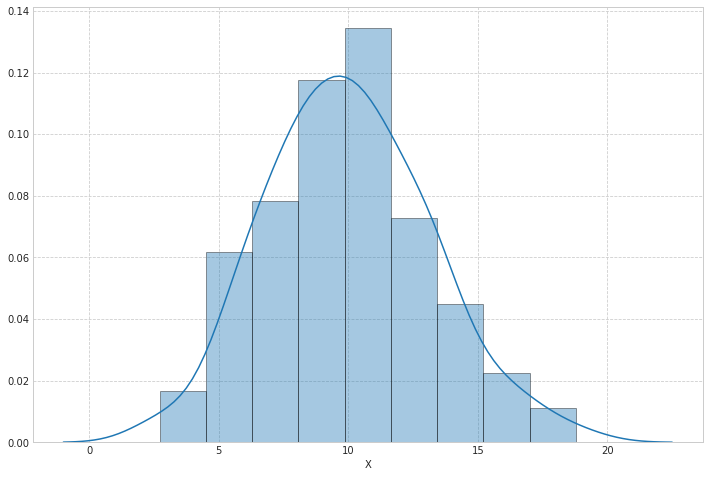

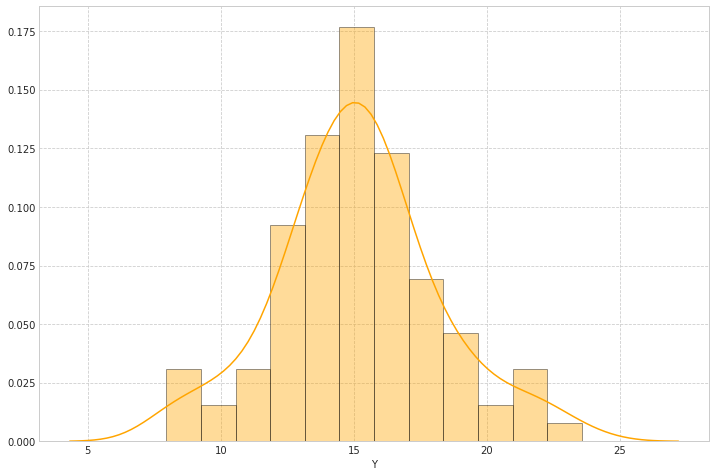

In [3]:
seaborn.set_style("whitegrid", {
    'grid.linestyle': '--' })

subplots(figsize=(12,8))
seaborn.distplot(data.X, hist_kws=dict(edgecolor="k", linewidth=1))


subplots(figsize=(12,8))
seaborn.distplot(data.Y, color='orange', hist_kws=dict(edgecolor="k", linewidth=1))


Для того чтобы компактно представить выборку, пусть и с небольшой потерей точности, построим интервальный вариационный ряд.


## Построение вариационного ряда, получение относительных частот 

### Как строить вариационный ряд вручную

Для построения интервального вариационного ряда определи ширину интервалов. Для этого определим число интервалов по эмпирической формуле:
$$ n = [ log_2(N) ] $$
где N - объём выборки,

[ ] - обозночают целую часть числа

Тогда ширина интервала:

$$ h = \frac{max(X) - min(X)}{n-1} $$


Левую границу первого интервала отодвиним влево на $0.5 h$, чтобы минимальное значение выборки не лежало на границе первого интервала.




### Автоматическое построение

Функции для построения гистограммы сами определяют число интервалов (столбцов).

Остаётся только вызывать функцию hist с параметром bins  равным число столбцов на гистограмме

(array([ 3., 11., 14., 21., 24., 13.,  8.,  4.,  2.]),
 array([ 2.72      ,  4.50555556,  6.29111111,  8.07666667,  9.86222222,
        11.64777778, 13.43333333, 15.21888889, 17.00444444, 18.79      ]),
 <a list of 9 Patch objects>)

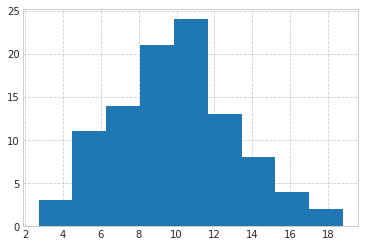

In [4]:
from math import *

# вычислим интервалы и частоты
hist(data.X, bins=9)

# объём выборки (число значений в массиве X)

# N = X.size

# # число и ширина интервалов
# n = 1 + int( log2( N ))
# h = (max(X)-min(X)) / (n-1)

# print(f"Ширина интервала {h:.2f}")

# # Определим новые границы интервалов.
# min_x = min(X)
# max_x = max(X)

# print(f"min X: {min_x:.2f}")
# print(f"max X: {max_x:.2f}")

# intervals = []
# left = min_x - h/2
# for i in range(1, n+1):
#     intervals += [ (left + h*(i-1), 
#                     left + h*i) ]

    
# # преобразуем intervals в двумерный массив
# intervals = np.array(intervals)
# print("Интервалы")
# print(intervals)

Выше будут напечатаны два массива

Например:
`(array([ 3., 11., 14., 21., 24., 13.,  8.,  4.,  2.]),
 array([ 2.72      ,  4.50555556,  6.29111111,  8.07666667,  9.86222222,
        11.64777778, 13.43333333, 15.21888889, 17.00444444, 18.79      ]),`


- первый массив (array, первая строка) - это частоты
- второй массив (вторая и третья строки) - границы интервалов


### Проверка гипотезы о нормальности распределения

$H_0$: выборка сделана из нормально распределённой ген. совокупности

см. спраку по функции normaltest: help( scipy.stats.normaltest )

Проверка осуществляется по p-value



Здесь и далее будем использовать уровень значимости $\alpha=0.05$

In [5]:
help( scipy.stats.normaltest )

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

In [6]:
scipy.stats.normaltest(data.X)

NormaltestResult(statistic=1.061976155736523, pvalue=0.588023669366947)

**p-value** - вероятность получить такие, или ещё более выраженные результаты не случайно.

Т.е. p-value будет означать веростность c которой нулевая гипотеза будет ошибочно отвергнута.

https://ru.wikipedia.org/wiki/P-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5

https://habrahabr.ru/company/stepic/blog/250527/




#### Общее правило при проверке статистических гипотез
если p-value < $\alpha$, то нулевая гипотеза отклоняется

### Вычисление доверительных интервалов (confidence interval) для математических ожиданий

In [7]:
# для выборки из X
# loc - среденее по выборке
# scale - с.к.о по выборке
scipy.stats.t.interval(0.95, len(data.X)-1, loc=numpy.mean(data.X), scale=scipy.stats.sem(data.X))

(9.385004334128201, 10.6237956658718)

In [8]:
# для выборки из Y
scipy.stats.t.interval(0.95, len(data.Y)-1, loc=numpy.mean(data.Y), scale=scipy.stats.sem(data.Y))

(14.54711234094314, 15.756887659056861)

### Диаграмма boxplot или "ящик с усами"

По этой диаграмме можно судить от схожести выборок. 

https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8


<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png",width=450, alt="картинка с Википедии">

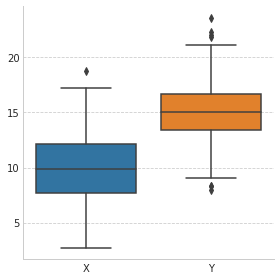

In [9]:
seaborn.factorplot(data=data, kind="box")

## Проверка гипотезы о равенстве средних

Просмотрим справку по функции ttest_rel (см. ниже)

Оттуда нужно узнать о том, как сформулировано нулевая гопотеза

` null hypothesis that 2 related or repeated samples have identical average (expected) values.`

Спойлер: $H_0$: средние равны

In [10]:
help(scipy.stats.ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculate the T-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        t-statistic
    pvalue : float or array
        two-tailed p-value
    
    Notes
    -----
    Examples for the use are sco

In [11]:
scipy.stats.ttest_rel(data.X, data.Y)

Ttest_relResult(statistic=-13.437185737200924, pvalue=4.7776144226923696e-24)

Снова получено p-value. По нему можно сделать вывод относительно нулевой гипотезы: принимать или отклонять

## Проверка гипотезы о равенстве выборочного срднего математическому ожиданию генеральной совокупности

In [12]:
scipy.stats.ttest_1samp(data.X, meanX)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## Коэффициент корреляции Пирсона (линейного к.к.)

Функция scipy.stats.pearsonr возвращает два числа: коэффициент корреляции и p-value.
Поэтому здесь же можно проверить и гипотезу о значимости линейного к.к.

$H_0$: линейный к.к. не значим

Т.е. корреляция между случанйми величинами получена совершенно случайно

In [13]:
help( scipy.stats.pearsonr )

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculate a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 5

In [14]:
scipy.stats.pearsonr(data.X, data.Y)

(0.22920278610291064, 0.02179978948008989)

## Диаграмма рассеивания с линией регрессии (и гистограммы)

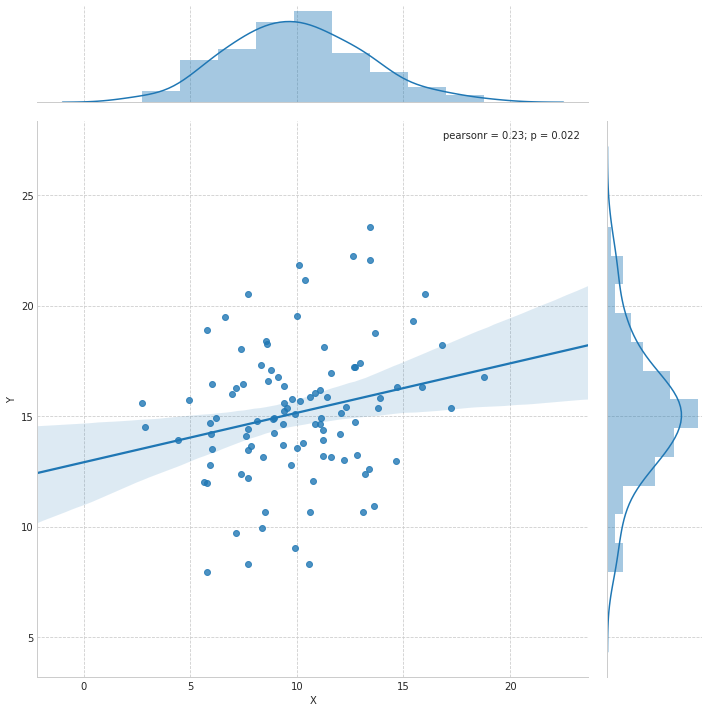

In [15]:
seaborn.jointplot(data.X, data.Y, kind='reg', size = 10)

### уравнение линейной регрессии

получим уравнение линейной регрессии вида $$y = k x + b$$

Уравнение регресии ещё называют *моделью* регрессии.

Для этого воспользуемся функцией scipy.stats.linregress.
Она scipy.stats.linregress возвращает 5 чисел:

slope - k

intercept - b

rvalue - коэффициент детерминации $R^2$.  доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости. $0 < R^2 < 0$

https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8

pvalue - уровень значимости коэффициента корреляции

stderr - характеризует ошибку вычисления slope

In [16]:
reg = scipy.stats.linregress(data.X, data.Y)
print(reg)

k = reg.slope
b = reg.intercept

print()
print ("Уравнение линейной регресии y = {:.2f} x + {:.2f}".format(k, b))
     

LinregressResult(slope=0.22383420545889912, intercept=12.91267307490699, rvalue=0.22920278610291056, pvalue=0.02179978948009007, stderr=0.09602301988038965)

Уравнение линейной регресии y = 0.22 x + 12.91
